In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn import linear_model

In [39]:
df=pd.read_csv("/content/student_mat_2173a47420.csv",sep=';')


In [40]:
df.shape

(395, 33)

In [41]:
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


##DATA DETAILS:
ROWS : 395 COL:31
NO NULL VALUES


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [43]:
for column in df:
  if np.dtype(df[column])=="int64":
    print(df[column])

0      18
1      17
2      15
3      15
4      16
       ..
390    20
391    17
392    21
393    18
394    19
Name: age, Length: 395, dtype: int64
0      4
1      1
2      1
3      4
4      3
      ..
390    2
391    3
392    1
393    3
394    1
Name: Medu, Length: 395, dtype: int64
0      4
1      1
2      1
3      2
4      3
      ..
390    2
391    1
392    1
393    2
394    1
Name: Fedu, Length: 395, dtype: int64
0      2
1      1
2      1
3      1
4      1
      ..
390    1
391    2
392    1
393    3
394    1
Name: traveltime, Length: 395, dtype: int64
0      2
1      2
2      2
3      3
4      2
      ..
390    2
391    1
392    1
393    1
394    1
Name: studytime, Length: 395, dtype: int64
0      0
1      0
2      3
3      0
4      0
      ..
390    2
391    0
392    3
393    0
394    0
Name: failures, Length: 395, dtype: int64
0      4
1      5
2      4
3      3
4      4
      ..
390    5
391    2
392    5
393    4
394    3
Name: famrel, Length: 395, dtype: int64
0      3
1    

In [44]:
mod_df=df[["G1", "G2", "G3", "studytime", "failures", "absences"]]

In [45]:
mod_df.head()

,G1,G2,G3,studytime,failures,absences
0,5,6,6,2,0,6
1,5,5,6,2,0,4
2,7,8,10,2,3,10
3,15,14,15,3,0,2
4,6,10,10,2,0,4


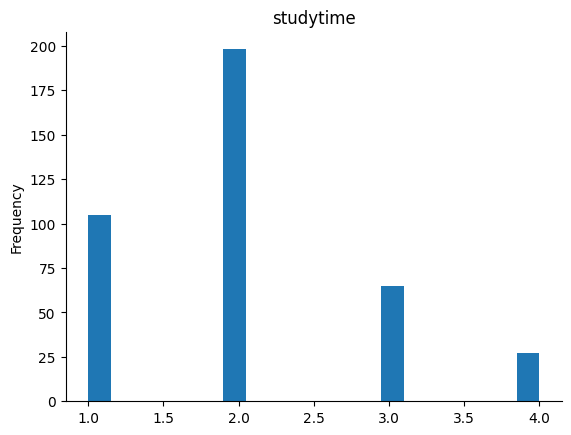

In [46]:
# @title studytime

from matplotlib import pyplot as plt
mod_df['studytime'].plot(kind='hist', bins=20, title='studytime')
plt.gca().spines[['top', 'right',]].set_visible(False)

LINEAER MODEL

In [53]:
import sklearn.model_selection
from sklearn.model_selection import train_test_split

In [54]:
p='G3'

In [55]:
X = mod_df.drop([p], 1) # Features
y = mod_df[[p]] # L

<ipython-input-55-ee52432c79af>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X = mod_df.drop([p], 1) # Features


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [58]:
LR= linear_model.LinearRegression()

In [60]:
y_pred=LR.fit(X_train,y_train)

In [63]:
predictions = LR.predict(X_test)

In [64]:
print(predictions)

[[ 6.01113762]
 [12.20306263]
 [ 3.42583945]
 [ 8.52243043]
 [ 7.87300271]
 [12.70478596]
 [18.6925959 ]
 [ 7.10011213]
 [ 7.22885591]
 [12.6388124 ]
 [14.95294333]
 [ 6.26901605]
 [13.65241561]
 [11.65193785]
 [14.43175056]
 [ 7.74073579]
 [ 6.24924059]
 [10.67958176]
 [15.17063948]
 [ 8.35493681]
 [14.20153818]
 [16.12152392]
 [14.95294333]
 [ 5.07170458]
 [ 7.92154672]
 [19.91293763]
 [10.45863081]
 [ 9.18808655]
 [17.12987012]
 [10.77259   ]
 [ 9.31519509]
 [ 7.23611513]
 [15.02617612]
 [12.86176556]
 [ 6.03354665]
 [ 4.1659295 ]
 [-2.02631531]
 [15.10992293]
 [11.87489101]
 [ 7.6285779 ]
 [ 4.43648929]
 [10.16770188]
 [14.05907703]
 [ 7.82649858]
 [15.53605378]
 [ 9.62147664]
 [12.05164607]
 [14.44687646]
 [12.50886749]
 [15.61454358]
 [13.37890245]
 [14.95294333]
 [10.31216524]
 [ 8.36545083]
 [ 4.34702809]
 [12.95802861]
 [ 9.8444298 ]
 [ 5.96031387]
 [15.17589649]
 [16.36594873]
 [12.65333085]
 [ 8.593661  ]
 [ 6.31258058]
 [ 4.15806282]
 [ 5.35013105]
 [17.20110069]
 [ 7.75791

In [67]:
acc = LR.score(X_test, y_test)
print(acc)

print('Coefficient: \n', LR.coef_)
print('Intercept: \n', LR.intercept_)

0.7821754247320556
Coefficient: 
 [[ 0.14446336  0.97961532 -0.07123057 -0.45581289  0.0392449 ]]
Intercept: 
 [-1.6213124]
